.    
    
    Le but de ce projet est de faire une prévision pour deux (02) points de ventes, pour le mois de février 2019
    
    
.    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from fbprophet import Prophet


%matplotlib inline

In [2]:
df = pd.read_csv("sales_technical_test.csv")

In [3]:
df.shape

(1522, 3)

In [4]:
df.head(10)

timestamp  tot  storeId
0  2017-01-01  132        1
1  2017-01-02  176        1
2  2017-01-03  128        1
3  2017-01-04  137        1
4  2017-01-05  109        1
5  2017-01-06  156        1
6  2017-01-07  139        1
7  2017-01-08  117        1
8  2017-01-09  133        1
9  2017-01-10  151        1

In [5]:
df.describe()

tot      storeId
count  1522.000000  1522.000000
mean    119.159001     1.500000
std      40.311799     0.500164
min      34.000000     1.000000
25%      86.000000     1.000000
50%     120.000000     1.500000
75%     148.000000     2.000000
max     257.000000     2.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 3 columns):
timestamp    1522 non-null object
tot          1522 non-null int64
storeId      1522 non-null int64
dtypes: int64(2), object(1)
memory usage: 35.8+ KB


Ci-dessus nous voyons bien que la base ne contient pas de cellules vides. Notre étude peut donc être faite sans imputation des cases vides.


Pour la suite nous allons donc avant de faire la prévision de faire une étude afin de voir si y'a une tendance, une saisonnalité des ventes ou pas. Souvent en série chronologique il peut  y avoir des outliers.

De ce fait, l'analyse graphique nous permettra d'être beaucoup plus claire sur cet aspect

# Analyse de la distribution

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


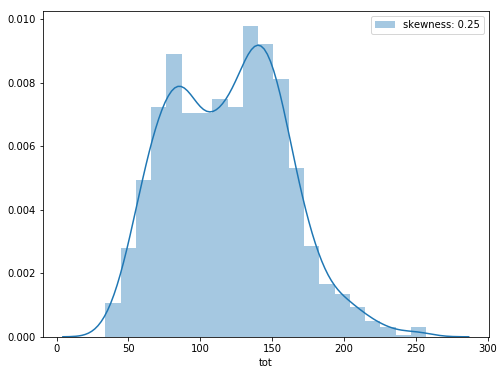

In [7]:
fig = plt.figure (figsize = (8, 6))
sk = sns.distplot (df['tot'])
sk = sk.legend (['skewness: {:.2f}'.format (df['tot'].skew())]);

ici on a un coefficient d'asymétrie qui est relativement faible, la distribution est donc presque symétrique.


Rappelons que:
skew > 0 distribution positive.skew < 0 distribution négative.skew = 0 distribution symétrique.

voyons la corrélation

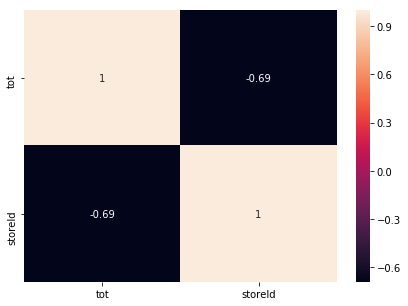

In [8]:
f, ax = plt.subplots (figsize =(7, 5))
sns.heatmap (df.corr(), annot = True,  ax = ax )
# sns.heatmap est le code qui permet de trouver le coef de corrélation
plt.show()

faisons maintenant le graphique pour voir l'évolution

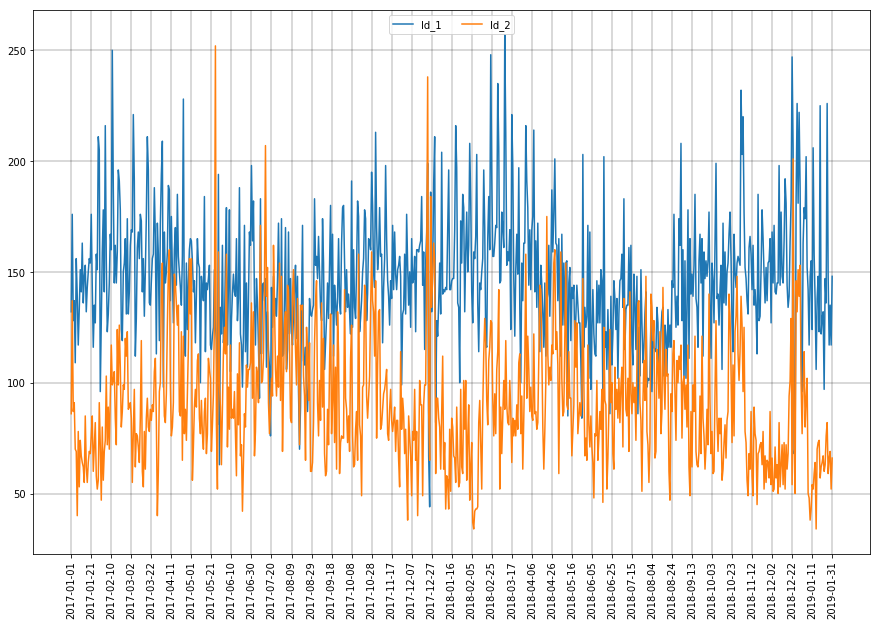

In [9]:
ds = list (df['timestamp'].unique())
fig = plt.figure (figsize = (15, 10))
graph = fig.add_subplot (111)
graph.grid(linestyle='-', linewidth='0.3', color='black')

graph.plot (ds, df.loc[df['storeId']==1, 'tot'], label = 'Id_1')
graph.plot (ds, df.loc[df['storeId']==2, 'tot'], label = 'Id_2')

graph.set_xticks (range (0, len(ds) + 1, 20))
graph.set_xticklabels (ds[0::20], rotation = "vertical")
graph.legend (loc = "upper center", ncol = 2)

A première vue on voit de façon nette et précise que le point de vente 1 (storeId_1) cumule le plus de vente que storeId2.

On note la présence des pics qui ne se répétent pas de façon homogène, ce qui rejette l'hypothèse de présence d'une saisonnalité.

Cependant la tendance est aléatoire, elle suit pas un rythme fixe. Elle est souvent haussière, tantôt à la baisse et le même phénomène peut se répéter à un échelle inconnu.

En conclusion on peut dire qu'entre les deux points de vente, le storeId_1 est beaucoup plus performant en terme de Chiffres d'Affaires.

# Algorithme de prévisions

On commencera par faire la prévision du storeId_1

Le package fbprophet ne doit contenir que deux colonnes: une qui contient le temps et une autre qui contient du numérique

# prévision du point de vente numéro 1

In [10]:
vente1 = df[df.storeId == 1].loc[:, ['timestamp', 'tot']]
vente1

timestamp  tot
0    2017-01-01  132
1    2017-01-02  176
2    2017-01-03  128
3    2017-01-04  137
4    2017-01-05  109
5    2017-01-06  156
6    2017-01-07  139
7    2017-01-08  117
8    2017-01-09  133
9    2017-01-10  151
10   2017-01-11  141
11   2017-01-12  163
12   2017-01-13  136
13   2017-01-14  148
14   2017-01-15  153
15   2017-01-16  132
16   2017-01-17  143
17   2017-01-18  150
18   2017-01-19  156
19   2017-01-20  154
20   2017-01-21  176
21   2017-01-22  143
22   2017-01-23  116
23   2017-01-24  135
24   2017-01-25  127
25   2017-01-26  158
26   2017-01-27  151
27   2017-01-28  211
28   2017-01-29  205
29   2017-01-30   96
..          ...  ...
731  2019-01-02  163
732  2019-01-03  179
733  2019-01-04  174
734  2019-01-05  202
735  2019-01-06  152
736  2019-01-07  142
737  2019-01-08  117
738  2019-01-09  148
739  2019-01-10  155
740  2019-01-11  124
741  2019-01-12  206
742  2019-01-13  158
743  2019-01-14  137
744  2019-01-15  106
745  2019-01-16  138
746  2019-01-17  148
747  2019-01-18  123
748  2019-01-19  225
749  2019-01-20  122
750  2019-01-21  129
751  2019-01-22  132
752  2019-01-23   97
753  2019-01-24  147
754  2019-01-25  136
755  2019-01-26  226
756  2019-01-27  148
757  2019-01-28  117
758  2019-01-29  135
759  2019-01-30  117
760  2019-01-31  148

[761 rows x 2 columns]

création du model prophet

In [11]:
my_model = Prophet()
df1=vente1.rename(columns={'timestamp':'ds', 'tot':'y'})
my_model.fit(df1);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Ici on va créer notre échantillon sur laquelle la prévision sera faite. On affichera les 40 dernieres valeurs (donc du 20-01-2018 au 28-02-2019)

In [12]:
future = my_model.make_future_dataframe(periods=28, freq = 'd')
future.tail(40)

ds
749 2019-01-20
750 2019-01-21
751 2019-01-22
752 2019-01-23
753 2019-01-24
754 2019-01-25
755 2019-01-26
756 2019-01-27
757 2019-01-28
758 2019-01-29
759 2019-01-30
760 2019-01-31
761 2019-02-01
762 2019-02-02
763 2019-02-03
764 2019-02-04
765 2019-02-05
766 2019-02-06
767 2019-02-07
768 2019-02-08
769 2019-02-09
770 2019-02-10
771 2019-02-11
772 2019-02-12
773 2019-02-13
774 2019-02-14
775 2019-02-15
776 2019-02-16
777 2019-02-17
778 2019-02-18
779 2019-02-19
780 2019-02-20
781 2019-02-21
782 2019-02-22
783 2019-02-23
784 2019-02-24
785 2019-02-25
786 2019-02-26
787 2019-02-27
788 2019-02-28

A présent on peut faire la prévision.
On s'intéressera qu'à quelques valeurs, vue qu'on avait posé que "y = tot" donc que les valeurs max et min de y .

In [13]:
forecast = my_model.predict(future)
forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2017-01-01  145.542200  136.157748  195.188330   145.542200   145.542200   
1   2017-01-02  145.548974   99.369173  160.188348   145.548974   145.548974   
2   2017-01-03  145.555749  108.061571  167.910138   145.555749   145.555749   
3   2017-01-04  145.562524  106.561882  166.378844   145.562524   145.562524   
4   2017-01-05  145.569298  120.493556  178.221664   145.569298   145.569298   
5   2017-01-06  145.576073  114.411159  174.269567   145.576073   145.576073   
6   2017-01-07  145.582848  129.653626  192.178634   145.582848   145.582848   
7   2017-01-08  145.589622  130.931623  190.382088   145.589622   145.589622   
8   2017-01-09  145.596397   97.261289  161.793327   145.596397   145.596397   
9   2017-01-10  145.603172  108.652278  167.524808   145.603172   145.603172   
10  2017-01-11  145.609946  106.357748  167.830837   145.609946   145.609946   
11  2017-01-12  145.616721  119.704512  181.369805   145.616721   145.616721   
12  2017-01-13  145.623496  114.510602  176.522322   145.623496   145.623496   
13  2017-01-14  145.630270  127.178934  189.878916   145.630270   145.630270   
14  2017-01-15  145.637045  133.573629  193.745214   145.637045   145.637045   
15  2017-01-16  145.643819  101.921664  163.223299   145.643819   145.643819   
16  2017-01-17  145.650594  111.830314  170.027815   145.650594   145.650594   
17  2017-01-18  145.657369  110.889181  169.459278   145.657369   145.657369   
18  2017-01-19  145.664143  120.733905  184.765366   145.664143   145.664143   
19  2017-01-20  145.670918  119.218623  180.509890   145.670918   145.670918   
20  2017-01-21  145.677693  133.634290  195.297589   145.677693   145.677693   
21  2017-01-22  145.684467  138.237467  199.593246   145.684467   145.684467   
22  2017-01-23  145.691242  105.851311  166.221722   145.691242   145.691242   
23  2017-01-24  145.698017  112.293999  176.307136   145.698017   145.698017   
24  2017-01-25  145.704791  111.318632  176.417660   145.704791   145.704791   
25  2017-01-26  145.711566  124.776540  184.671035   145.711566   145.711566   
26  2017-01-27  145.718341  121.405600  182.822243   145.718341   145.718341   
27  2017-01-28  145.725115  138.786444  200.136881   145.725115   145.725115   
28  2017-01-29  145.731890  138.097906  199.870613   145.731890   145.731890   
29  2017-01-30  145.738665  105.699817  169.667164   145.738665   145.738665   
..         ...         ...         ...         ...          ...          ...   
759 2019-01-30  147.337756  118.054415  176.704355   147.337756   147.337756   
760 2019-01-31  147.338855  126.754516  187.928676   147.338855   147.338855   
761 2019-02-01  147.339953  125.417708  185.610074   147.339953   147.339953   
762 2019-02-02  147.341051  140.493767  202.205854   147.341051   147.341051   
763 2019-02-03  147.342149  143.661127  204.577083   147.342149   147.342149   
764 2019-02-04  147.343247  112.314558  172.328028   147.343247   147.343247   
765 2019-02-05  147.344345  117.051963  180.339979   147.344345   147.344345   
766 2019-02-06  147.345444  114.745526  179.081708   147.345444   147.345444   
767 2019-02-07  147.346542  129.273618  191.920998   147.346542   147.346605   
768 2019-02-08  147.347640  127.455393  188.308480   147.347580   147.347798   
769 2019-02-09  147.348738  143.375616  204.901748   147.348627   147.349035   
770 2019-02-10  147.349836  144.762792  206.635516   147.349610   147.350259   
771 2019-02-11  147.350934  112.775415  175.547392   147.350567   147.351507   
772 2019-02-12  147.352033  122.548144  182.352779   147.351516   147.352748   
773 2019-02-13  147.353131  121.363167  183.176304   147.352529   147.353973   
774 2019-02-14  147.354229  135.075216  195.553906   147.353508   147.355285   
775 2019-02-15  147.355327  131.543870  192.209706   147.354444   147.356527   
776 2019-02-16  147.356425  145.912786  209.037637   147.355328   147.357865   
777 2019-02-

Ici on prendra que le yhat, yhat_lower and upper

In [14]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(28)
# je précise tail(28) pour bien voir si les dernières valeurs sont celles du mois de Février

ds        yhat  yhat_lower  yhat_upper
761 2019-02-01  156.178146  125.417708  185.610074
762 2019-02-02  170.311486  140.493767  202.205854
763 2019-02-03  173.035994  143.661127  204.577083
764 2019-02-04  140.833146  112.314558  172.328028
765 2019-02-05  149.487480  117.051963  180.339979
766 2019-02-06  149.134558  114.745526  179.081708
767 2019-02-07  160.458380  129.273618  191.920998
768 2019-02-08  158.477677  127.455393  188.308480
769 2019-02-09  172.721124  143.375616  204.901748
770 2019-02-10  175.580801  144.762792  206.635516
771 2019-02-11  143.533318  112.775415  175.547392
772 2019-02-12  152.357547  122.548144  182.352779
773 2019-02-13  152.182776  121.363167  183.176304
774 2019-02-14  163.686326  135.075216  195.553906
775 2019-02-15  161.880051  131.543870  192.209706
776 2019-02-16  176.285773  145.912786  209.037637
777 2019-02-17  179.288941  149.951209  209.310723
778 2019-02-18  147.359957  115.320756  177.264255
779 2019-02-19  156.272091  125.390009  184.332825
780 2019-02-20  156.149788  124.811952  186.355718
781 2019-02-21  167.666424  137.567633  198.230700
782 2019-02-22  165.830907  135.195244  196.700806
783 2019-02-23  180.163190  149.085714  213.250629
784 2019-02-24  183.047966  152.424874  212.681998
785 2019-02-25  150.956003  117.203195  181.249251
786 2019-02-26  159.662038  130.636699  189.877461
787 2019-02-27  159.293025  127.450813  190.413629
788 2019-02-28  170.525804  142.225987  202.964905

# Visualisation de la prédiction

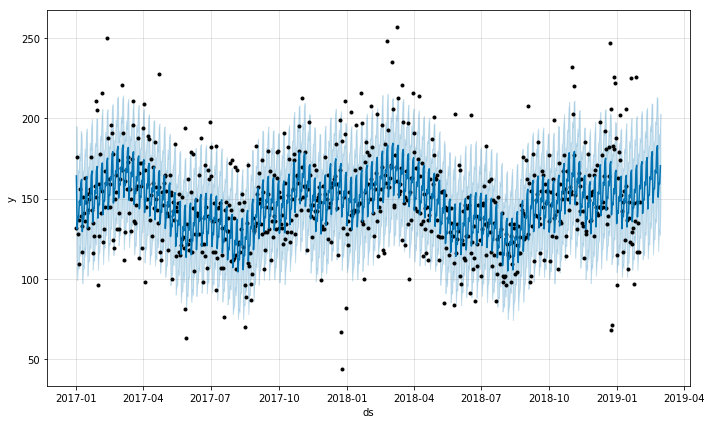

In [15]:
my_model.plot(forecast);

Ci-dessus nous avons la modélisation selon le package fbprophet.
Ce qui nous donne la prédiction de la série temporelle en noire, les valeurs de la prévision sont en ligne bleu et en bleue claire (autour) on l'intervelle d'incertitude de nos valeurs prévues.

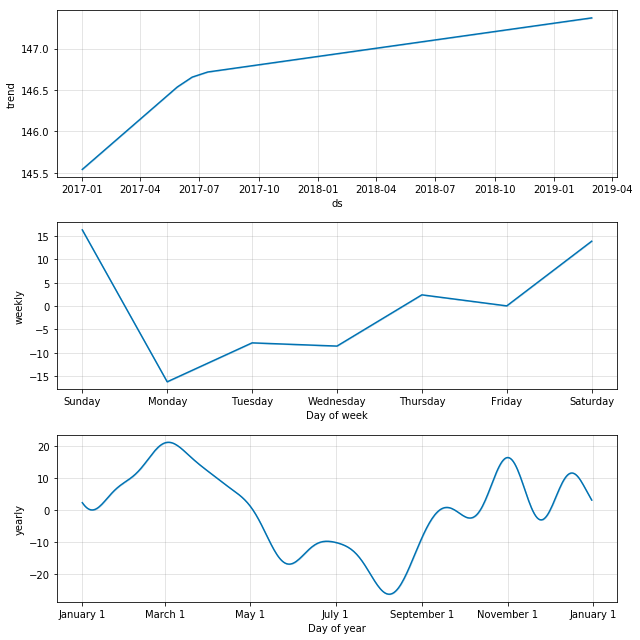

In [16]:
my_model.plot_components (forecast);

nous avons pour le storeId_1 le graphe de la tendance représenté par le le premier (trend) qui décrit l'allure de la croissance des ventes (hausse, baisse ou constance) selon un moment bien défini.
Viens ensuite la représentation graphique hebdomadaire qui prend en compte les performances obtenues dans la semaines et enfin une représention pour l'année.

création de notre fichier csv pour les valeurs prévues

In [17]:
storeId_vp1 = forecast[['ds', 'yhat']].tail(28)
store_1 = storeId_vp1.rename (columns = {'ds':'timestamp', 'yhat': 'valeurs_prévues_tot_store1'})
store_1.to_csv ("store_1.csv", index = None, header=True)
print (store_1)

     timestamp  valeurs_prévues_tot_store1
761 2019-02-01                  156.178146
762 2019-02-02                  170.311486
763 2019-02-03                  173.035994
764 2019-02-04                  140.833146
765 2019-02-05                  149.487480
766 2019-02-06                  149.134558
767 2019-02-07                  160.458380
768 2019-02-08                  158.477677
769 2019-02-09                  172.721124
770 2019-02-10                  175.580801
771 2019-02-11                  143.533318
772 2019-02-12                  152.357547
773 2019-02-13                  152.182776
774 2019-02-14                  163.686326
775 2019-02-15                  161.880051
776 2019-02-16                  176.285773
777 2019-02-17                  179.288941
778 2019-02-18                  147.359957
779 2019-02-19                  156.272091
780 2019-02-20                  156.149788
781 2019-02-21                  167.666424
782 2019-02-22                  165.830907
783 2019-02

En haut nous avons fait une prédiction pour le storeId1 et transformé en fichier csv les valeur de la prévision.

C'est de la même façon que nous allons faire avec le second point de vente (storeId2)

# Prévision du point de vente n2

In [18]:
vente2 = df[df.storeId == 2].loc[:, ['timestamp', 'tot']]
vente2.head(5)

timestamp  tot
761  2017-01-01   86
762  2017-01-02  137
763  2017-01-03   87
764  2017-01-04   91
765  2017-01-05   70

In [19]:
my_model_1 = Prophet()
df2=vente2.rename(columns={'timestamp':'ds', 'tot':'y'})
my_model_1.fit(df2);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future1 = my_model_1.make_future_dataframe(periods=28, freq = 'd')
future1.head(5)

ds
0 2017-01-01
1 2017-01-02
2 2017-01-03
3 2017-01-04
4 2017-01-05

Faisons maintenant la modélisation de l'algo de la prédiction

In [21]:
forecast1 = my_model_1.predict(future)
forecast1

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2017-01-01  94.735858   92.379445  151.083081    94.735858    94.735858   
1   2017-01-02  94.738356   66.288016  123.637007    94.738356    94.738356   
2   2017-01-03  94.740854   58.185334  115.905146    94.740854    94.740854   
3   2017-01-04  94.743351   57.069289  114.697053    94.743351    94.743351   
4   2017-01-05  94.745849   59.619711  117.668707    94.745849    94.745849   
5   2017-01-06  94.748347   68.368690  125.277901    94.748347    94.748347   
6   2017-01-07  94.750844   62.371047  122.945622    94.750844    94.750844   
7   2017-01-08  94.753342   76.325051  134.607215    94.753342    94.753342   
8   2017-01-09  94.755840   47.892188  104.975120    94.755840    94.755840   
9   2017-01-10  94.758338   36.648898   96.255289    94.758338    94.758338   
10  2017-01-11  94.760835   35.107381   95.369031    94.760835    94.760835   
11  2017-01-12  94.763333   41.682499   99.695355    94.763333    94.763333   
12  2017-01-13  94.765831   47.330892  108.006435    94.765831    94.765831   
13  2017-01-14  94.768328   47.375987  105.819056    94.768328    94.768328   
14  2017-01-15  94.770826   57.288292  119.195411    94.770826    94.770826   
15  2017-01-16  94.773324   31.423883   89.767393    94.773324    94.773324   
16  2017-01-17  94.775822   22.943289   82.715464    94.775822    94.775822   
17  2017-01-18  94.778319   23.602937   81.027042    94.778319    94.778319   
18  2017-01-19  94.780817   28.450267   88.212695    94.780817    94.780817   
19  2017-01-20  94.783315   37.682177   96.610491    94.783315    94.783315   
20  2017-01-21  94.785812   36.946410   96.437827    94.785812    94.785812   
21  2017-01-22  94.788310   49.485463  110.475624    94.788310    94.788310   
22  2017-01-23  94.790808   29.036448   87.767205    94.790808    94.790808   
23  2017-01-24  94.793305   18.948553   79.762650    94.793305    94.793305   
24  2017-01-25  94.795803   24.038559   82.274403    94.795803    94.795803   
25  2017-01-26  94.798301   30.449331   87.366850    94.798301    94.798301   
26  2017-01-27  94.800799   42.598950  100.377140    94.800799    94.800799   
27  2017-01-28  94.803296   44.432107  100.783722    94.803296    94.803296   
28  2017-01-29  94.805794   58.098644  117.587158    94.805794    94.805794   
29  2017-01-30  94.808292   33.144441   91.050197    94.808292    94.808292   
..         ...        ...         ...         ...          ...          ...   
759 2019-01-30  85.115683   18.707407   77.943026    85.115683    85.115683   
760 2019-01-31  85.092452   24.104936   84.921733    85.092452    85.092452   
761 2019-02-01  85.069220   41.490819   96.504638    85.069220    85.069220   
762 2019-02-02  85.045988   40.626460  101.524079    85.045988    85.045988   
763 2019-02-03  85.022756   56.534448  112.619301    85.022756    85.022756   
764 2019-02-04  84.999525   31.655413   91.813610    84.999525    84.999525   
765 2019-02-05  84.976293   26.537269   88.963952    84.976293    84.976293   
766 2019-02-06  84.953061   32.916614   89.871149    84.953061    84.953061   
767 2019-02-07  84.929829   37.717494   98.920366    84.929829    84.929829   
768 2019-02-08  84.906598   46.898216  108.438097    84.906502    84.906792   
769 2019-02-09  84.883366   55.098011  113.502192    84.882768    84.883932   
770 2019-02-10  84.860134   68.015328  128.225196    84.859139    84.861420   
771 2019-02-11  84.836902   41.320709  100.496502    84.835131    84.838647   
772 2019-02-12  84.813671   38.483486   97.444866    84.811380    84.816098   
773 2019-02-13  84.790439   41.218184  102.059805    84.787528    84.793424   
774 2019-02-14  84.767207   47.447376  108.692146    84.763596    84.771234   
775 2019-02-15  84.743975   59.004349  118.679133    84.739810    84.748837   
776 2019-02-16  84.720744   61.371434  121.190473    84.715810    84.726755   
777 2019-02-17  84.697512   71.144140  132.961894    84.691743

In [22]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(28)

# prévision du second point de vente pour le mois de Février 2019

ds        yhat  yhat_lower  yhat_upper
761 2019-02-01   68.204587   41.490819   96.504638
762 2019-02-02   70.794373   40.626460  101.524079
763 2019-02-03   85.879673   56.534448  112.619301
764 2019-02-04   62.214214   31.655413   91.813610
765 2019-02-05   58.007873   26.537269   88.963952
766 2019-02-06   61.429900   32.916614   89.871149
767 2019-02-07   68.597395   37.717494   98.920366
768 2019-02-08   80.567370   46.898216  108.438097
769 2019-02-09   82.921768   55.098011  113.502192
770 2019-02-10   97.636505   68.015328  128.225196
771 2019-02-11   73.479227   41.320709  100.496502
772 2019-02-12   68.674746   38.483486   97.444866
773 2019-02-13   71.407898   41.218184  102.059805
774 2019-02-14   77.811664   47.447376  108.692146
775 2019-02-15   88.958894   59.004349  118.679133
776 2019-02-16   90.447015   61.371434  121.190473
777 2019-02-17  104.266795   71.144140  132.961894
778 2019-02-18   79.199856   49.874902  109.287996
779 2019-02-19   73.483917   45.840134  101.693866
780 2019-02-20   75.315496   43.389162  103.826332
781 2019-02-21   80.837926   52.097224  111.680844
782 2019-02-22   91.133022   61.834733  121.446478
783 2019-02-23   91.805775   63.121121  119.945193
784 2019-02-24  104.853146   74.804364  135.235311
785 2019-02-25   79.061651   49.679404  107.821122
786 2019-02-26   72.672702   42.747170  102.649127
787 2019-02-27   73.885445   45.157226  102.958342
788 2019-02-28   78.844925   49.726374  106.907121

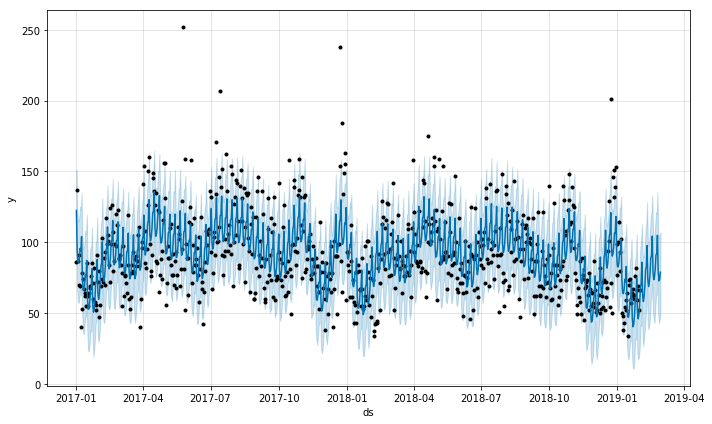

In [23]:
my_model_1.plot(forecast1);

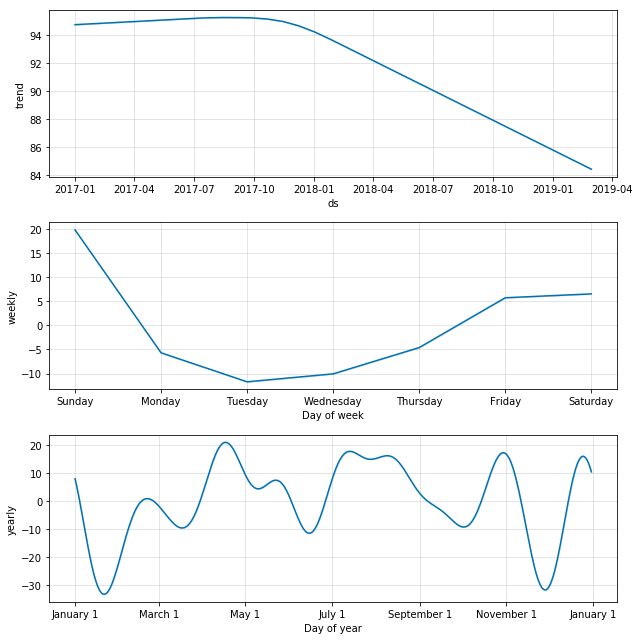

In [24]:
my_model_1.plot_components (forecast1);

In [25]:
storeId_vp2 = forecast1[['ds', 'yhat']].tail(28)
store_2 = storeId_vp2.rename (columns = {'ds':'timestamp', 'yhat': 'valeurs_prévues_tot_store2'})
store_2.to_csv ("store_2.csv", index = None, header=True)
print (store_2)

     timestamp  valeurs_prévues_tot_store2
761 2019-02-01                   68.204587
762 2019-02-02                   70.794373
763 2019-02-03                   85.879673
764 2019-02-04                   62.214214
765 2019-02-05                   58.007873
766 2019-02-06                   61.429900
767 2019-02-07                   68.597395
768 2019-02-08                   80.567370
769 2019-02-09                   82.921768
770 2019-02-10                   97.636505
771 2019-02-11                   73.479227
772 2019-02-12                   68.674746
773 2019-02-13                   71.407898
774 2019-02-14                   77.811664
775 2019-02-15                   88.958894
776 2019-02-16                   90.447015
777 2019-02-17                  104.266795
778 2019-02-18                   79.199856
779 2019-02-19                   73.483917
780 2019-02-20                   75.315496
781 2019-02-21                   80.837926
782 2019-02-22                   91.133022
783 2019-02

# Impression en un seul fichier csv

In [26]:
x = pd.read_csv ("store_1.csv")
y = pd.read_csv ("store_2.csv")

m = x.merge(y)
m.to_csv("sales_technical_prev.csv", sep = ',', index = None, header=True)
print (m)

     timestamp  valeurs_prévues_tot_store1  valeurs_prévues_tot_store2
0   2019-02-01                  156.178146                   68.204587
1   2019-02-02                  170.311486                   70.794373
2   2019-02-03                  173.035994                   85.879673
3   2019-02-04                  140.833146                   62.214214
4   2019-02-05                  149.487480                   58.007873
5   2019-02-06                  149.134558                   61.429900
6   2019-02-07                  160.458380                   68.597395
7   2019-02-08                  158.477677                   80.567370
8   2019-02-09                  172.721124                   82.921768
9   2019-02-10                  175.580801                   97.636505
10  2019-02-11                  143.533318                   73.479227
11  2019-02-12                  152.357547                   68.674746
12  2019-02-13                  152.182776                   71.407898
13  20